# Building a hand written digits classifier

In this project, we'll use neural networks to build a hand written digits classifier, using dataset from UCI.

In [9]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
%matplotlib inline

### Loading the data

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits['target'])

In [4]:
data = pd.DataFrame(digits['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


#### Visualising some of the digits

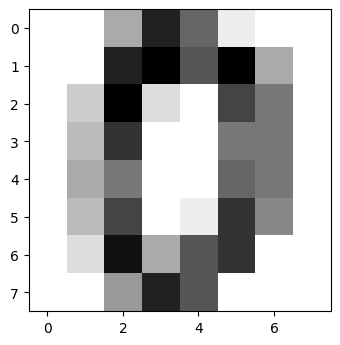

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

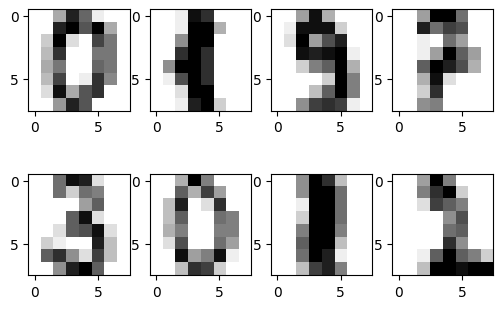

In [6]:
f,axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### Trying a K Nearest Neighbours Model

First, we'll try classifying the handwritten digits with a K Nearest Neighbours model to see how that performs.

In [7]:
# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9888728037614452

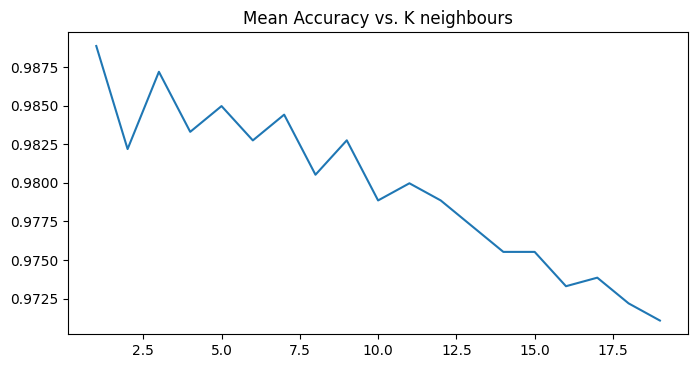

In [8]:
k_values = list(range(1,20))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. K neighbours")
plt.plot(k_values, k_overall_accuracies)

We can see that as the number of neighbours used to determine the digit goes up, the accuracy generally goes down.

There are a few downsides to using k-nearest neighbors:

- High memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- No model representation to debug and explore

### Testing a neural network with a single hidden layer

In [32]:
# 50% Train / test validation
def train_nn(neurons, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neurons)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_test(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

def cross_validate_train(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test(model, train_features, train_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

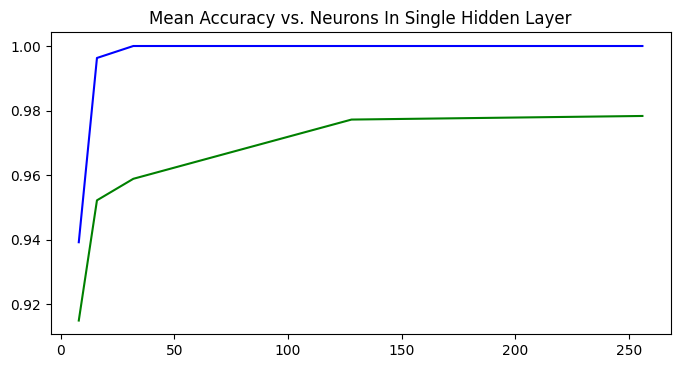

In [27]:
one_layer = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
neurons = []
neurons.append(i[0] for i in one_layer)
test_accuracies = []
train_accuracies = []

for n in one_layer:
    nn_test_accuracies = cross_validate_test(n)
    nn_train_accuracies = cross_validate_train(n)
    mean_test_accuracy = np.mean(nn_test_accuracies)
    mean_train_accuracy = np.mean(nn_train_accuracies)
    test_accuracies.append(mean_test_accuracy)
    train_accuracies.append(mean_train_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons, test_accuracies, color='green')
plt.plot(neurons, train_accuracies, color='blue')
plt.show()

In [41]:
print(test_accuracies)

[0.9471590486807879, 0.9766406540319584, 0.9760850984764029]


It looks like adding more neurons to the single hidden layer improved simple accuracy to close to 98%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

However, looking at how the models performed on the training data and test data, it's clear that the model is overfitting once the layer has 16 neurons or more, wiht nearly 100% accuracy on the training data but between 96-98% accuracy on the test data.

Furthermore, given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Testing a neural network with 2 hidden layers

In [33]:
two_layer = [(64,64)]
test_accuracies = []
train_accuracies = []

for n in two_layer:
    nn_test_accuracies = cross_validate_test(n)
    nn_train_accuracies = cross_validate_train(n)
    mean_test_accuracy = np.mean(nn_test_accuracies)
    mean_train_accuracy = np.mean(nn_train_accuracies)
    test_accuracies.append(mean_test_accuracy)
    train_accuracies.append(mean_train_accuracy)

print(test_accuracies)
print(train_accuracies)
# plt.figure(figsize=(8,4))
# plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
# plt.plot(neurons, test_accuracies, color='green')
# plt.plot(neurons, train_accuracies, color='blue')
# plt.show()

[0.9699566938876515]
[1.0]


The model with 2 hidden layers has about 97% accuracy, which is still lower than the K Nearest Neighbours model and the most accurate single layer model.

### Testing a model with 3 hidden layers

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

In [34]:
def cross_validate_test(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

def cross_validate_train(neurons):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neurons, train_features, train_labels)
        overall_accuracy = test(model, train_features, train_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

[10, 64, 128]


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

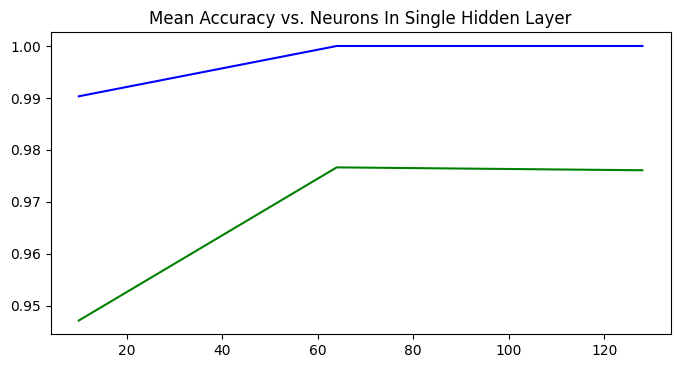

In [39]:
three_layer = [(10,10,10),
              (64,64,64),
              (128,128,128)]
neurons3 = []
for i in three_layer:
    neurons3.append(i[0])
print(neurons3)
test_accuracies = []
train_accuracies = []

for n in three_layer:
    nn_test_accuracies = cross_validate_test(n)
    nn_train_accuracies = cross_validate_train(n)
    mean_test_accuracy = np.mean(nn_test_accuracies)
    mean_train_accuracy = np.mean(nn_train_accuracies)
    test_accuracies.append(mean_test_accuracy)
    train_accuracies.append(mean_train_accuracy)

# print(test_accuracies)
# print(train_accuracies)
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neurons3, test_accuracies, color='green')
plt.plot(neurons3, train_accuracies, color='blue')
plt.show()

In [40]:
print(test_accuracies)

[0.9471590486807879, 0.9766406540319584, 0.9760850984764029]


Using 3 hidden layers produced accuracy of close to 98% as well, but the accuracy of predictions on the training data (>99%) suggests that the model could be overfitting, even with 6-fold cross validation.

### Conclusion

The results suggest that the neural networks do not necessarily perform better than a simple K Nearest Neighbours model (KNN) for handwritten digits classification. However, given the similar accuracy of a KNN model with the single and 3 layer neural network model, the neural network models may be a better choice as they do not require multiple comparisons to be made with each new observation.

However, it would be a good idea to test the following:
- More adjustments to the hyperparameters for the neural networks
- Try other machine learning models e.g. Decision Trees or Random Forest
- Experiment with different activation functions to see if the accuracies improve


Additional analysis could include:
- Research some techniques for visualizing weights in neural network models and adding a visualization step